# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [222]:
data=pd.read_csv('HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [223]:
# Dataframe for dataset
ds=pd.DataFrame(data=data)

# EDA

In [224]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have 1470 rows and 35 columns in the dataset.
BusinessTravel,Attrition,Gender,Department,MaritalStatus,ovet time are objet type data.
int..(26), object..(9)

In [225]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing values in the dataset

<AxesSubplot:>

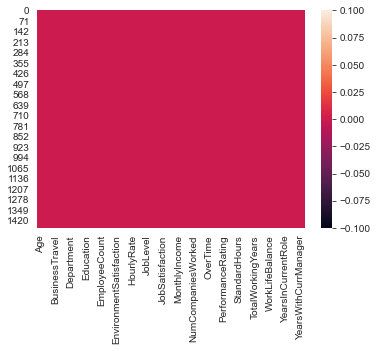

In [226]:
sns.heatmap(ds.isnull())

The heatmap also shows there is no missing values in the dataset

# Summary Statistics

In [227]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Key Observations 1)There is no diifernce between mean and median(50%) in almost all of the column 2)Thers is large differnce between the values of 75% aand 'max' in some of the columns. **which show that there are outliers and sknweness in the dataset.
3) Age, hourly rate and employeeNumber has high standard deviation.

In [228]:
# droping the column from dataset 
# Variables EmployeeCount, Over18, and StandardHours have a single value in the dataset and not contributing, we can drop these three columns
ds.drop(['StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)

<AxesSubplot:>

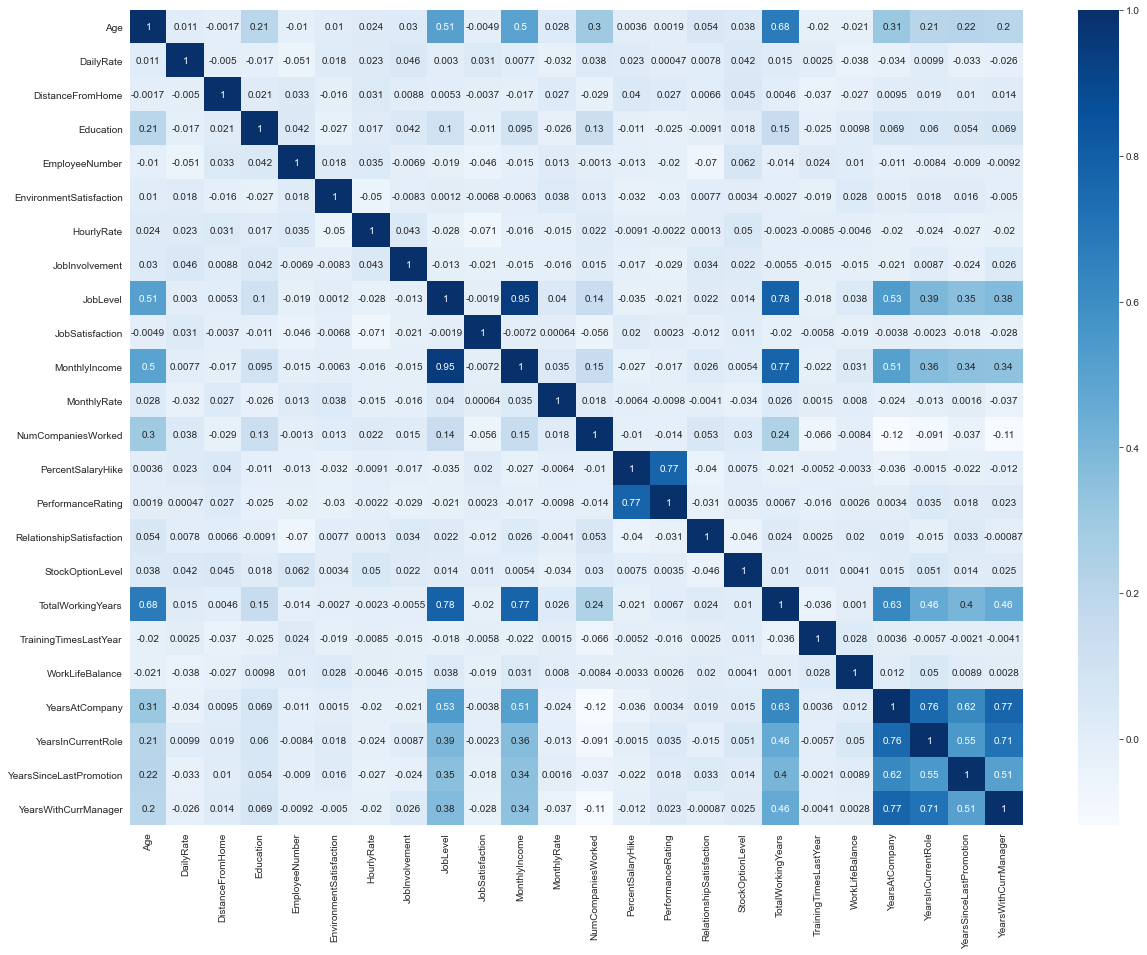

In [229]:
# Correlation Matrix ---Pearson Method
fig =plt.figure(figsize=(20,15))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

Key observation: 1) Performance rating and percent slary hike is higgly correlated
                 2) Job Level& Monthly income has strong positive correlation.
                 3) Job level & working years has strong positive correlation.
                4) Age & distance from home has negative correlation.

<AxesSubplot:xlabel='BusinessTravel', ylabel='EmployeeCount'>

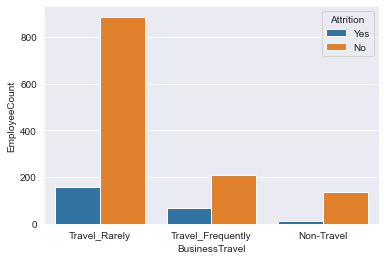

In [230]:
sns.barplot(x = data['BusinessTravel'] , y = data['EmployeeCount'],estimator = np.sum, hue = data['Attrition'])

Key Observation:The graph shows who has less frquency of business travel has less attrition rate 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

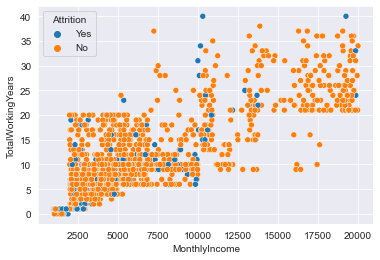

In [231]:
sns.scatterplot(x= ds['MonthlyIncome'], y = ds['TotalWorkingYears'], hue = ds['Attrition'])

Key Observation:employee with monthly income between ( 2500-10000)has high attrition rate, or people with highets monthley salary 20000 also has attrition rate.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

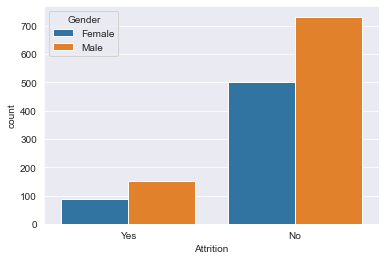

In [232]:
sns.countplot(x= ds['Attrition'], data = ds, hue = ds['Gender'])

Key Observation:Attrtion rate in male is higher than female

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

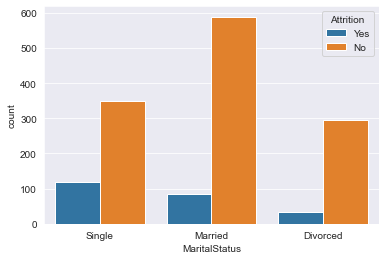

In [233]:
sns.countplot(x = ds['MaritalStatus'],hue=ds['Attrition'] , data = ds)

Key Observation:Attrtion rate  is higher in single.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

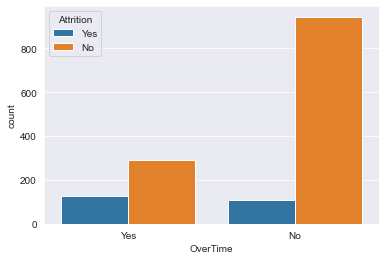

In [234]:
sns.countplot(x = ds['OverTime'],hue=ds['Attrition'] , data = ds)

employees who are doing overtime has higher attrition rate

<AxesSubplot:xlabel='Education', ylabel='count'>

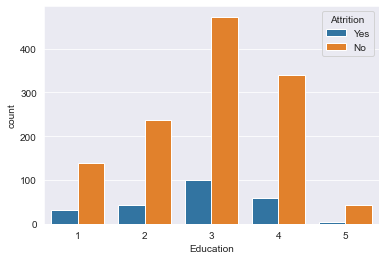

In [235]:
sns.countplot(x = ds['Education'],hue=ds['Attrition'] , data = ds)

We can see Employee Attrition rate is high for Below College & Bachelor degree

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

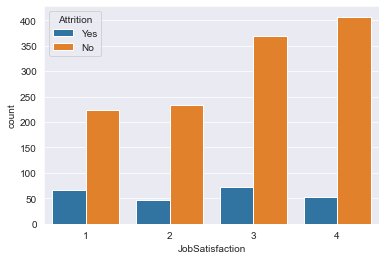

In [236]:
sns.countplot(x = ds['JobSatisfaction'],hue=ds['Attrition'] , data = ds)

Attrition rate of poor work  life balance is high, however attrition rate of Best worklife balance is higher than Good worklife balance

<AxesSubplot:xlabel='Department', ylabel='count'>

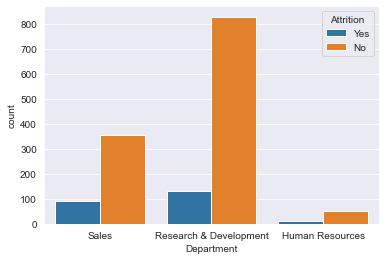

In [237]:
sns.countplot(x = ds['Department'],hue=ds['Attrition'] , data = ds)

Sales and R&D department has highest attrition rate compared to other department.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

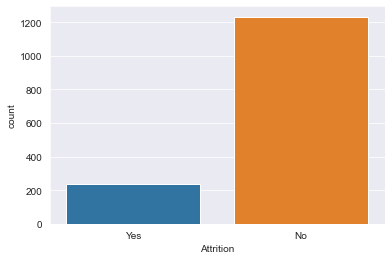

In [238]:
sns.countplot(x='Attrition',data=ds)

There is class imbalance in the target column attrition

# Finding the outliers and Skewness

Age                            AxesSubplot(0.125,0.125;0.0270979x0.755)
DailyRate                   AxesSubplot(0.157517,0.125;0.0270979x0.755)
DistanceFromHome            AxesSubplot(0.190035,0.125;0.0270979x0.755)
Education                   AxesSubplot(0.222552,0.125;0.0270979x0.755)
EmployeeNumber               AxesSubplot(0.25507,0.125;0.0270979x0.755)
EnvironmentSatisfaction     AxesSubplot(0.287587,0.125;0.0270979x0.755)
HourlyRate                  AxesSubplot(0.320105,0.125;0.0270979x0.755)
JobInvolvement              AxesSubplot(0.352622,0.125;0.0270979x0.755)
JobLevel                     AxesSubplot(0.38514,0.125;0.0270979x0.755)
JobSatisfaction             AxesSubplot(0.417657,0.125;0.0270979x0.755)
MonthlyIncome               AxesSubplot(0.450175,0.125;0.0270979x0.755)
MonthlyRate                 AxesSubplot(0.482692,0.125;0.0270979x0.755)
NumCompaniesWorked           AxesSubplot(0.51521,0.125;0.0270979x0.755)
PercentSalaryHike           AxesSubplot(0.547727,0.125;0.0270979

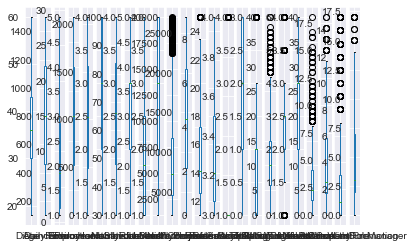

In [239]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,24))

<AxesSubplot:>

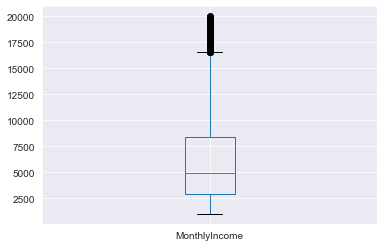

In [240]:
ds['MonthlyIncome'].plot.box()

<AxesSubplot:>

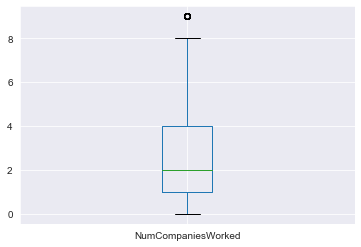

In [241]:
ds['NumCompaniesWorked'].plot.box()

<AxesSubplot:>

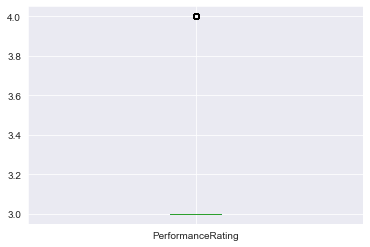

In [242]:
ds['PerformanceRating'].plot.box()

<AxesSubplot:>

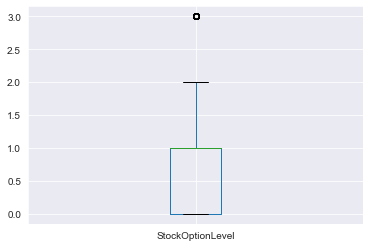

In [243]:
ds['StockOptionLevel'].plot.box()


<AxesSubplot:>

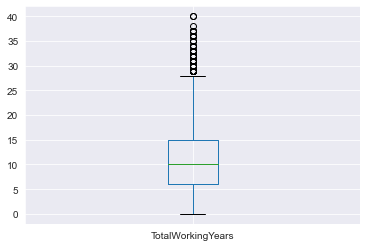

In [244]:
ds['TotalWorkingYears'].plot.box()

<AxesSubplot:>

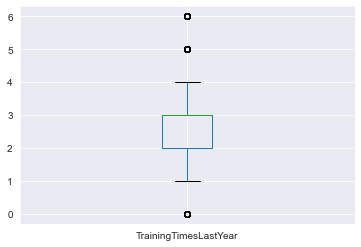

In [245]:
ds['TrainingTimesLastYear'].plot.box()

<AxesSubplot:>

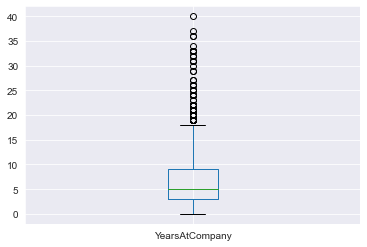

In [246]:
ds['YearsAtCompany'].plot.box()

<AxesSubplot:>

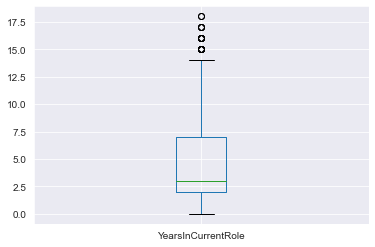

In [247]:
ds['YearsInCurrentRole'].plot.box()

<AxesSubplot:>

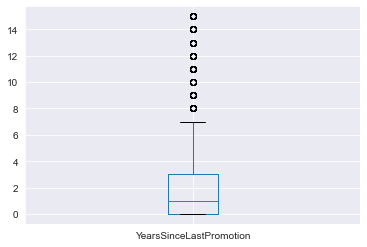

In [248]:
ds['YearsSinceLastPromotion'].plot.box()

<AxesSubplot:>

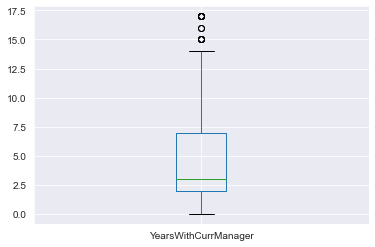

In [249]:
ds['YearsWithCurrManager'].plot.box()

Key observation: since we are not checking the outliers and skweness in object type variable.
1) there are outliers present in the  MonthlyIncome,YearsWithCurrManager,YearsInCurrentRole,YearsAtCompany,TrainingTimesLastYear,
TotalWorkingYears,PerformanceRating,NumCompaniesWorked.
2) Out of 24 numeric type variables 10 varibales have outliers present.

In [250]:
# checking skewness
ds.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [251]:
ds.shape

(1470, 32)

In [252]:
# Defining data frame having int type variables having outliers
m=ds[['MonthlyIncome','StockOptionLevel','YearsSinceLastPromotion',
      'YearsWithCurrManager','YearsInCurrentRole','YearsAtCompany','TrainingTimesLastYear',
      'TotalWorkingYears','PerformanceRating','NumCompaniesWorked']]


# Data Wrangling

In [253]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([3, 2, 2, 5, 4, 2, 7, 5, 7, 2, 2, 3, 4, 2, 5, 7, 3, 2, 3, 7, 4, 5,
       2, 3, 4, 2, 5, 5, 7, 4, 2, 2, 3, 7, 5, 2, 5, 2, 7, 4, 5, 5, 2, 3,
       5, 2, 5, 2, 5, 7, 3, 7, 3, 2, 5, 5, 3, 2, 4, 4, 5, 2, 2, 2, 2, 5,
       2, 3, 7, 2, 5, 5, 2, 2

In [254]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 83 rows will be droped

shape before remooving the outliers: (1470, 32)
shape after remooving the outliers: (1387, 32)


In [255]:
dsnew.shape

(1387, 32)

In [256]:
dsnew.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

Since we are accepting skewness +0.5/-0.5, still there are variables having skewness above this range like YearsAtCompany,YearsSinceLastPromotion etc.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

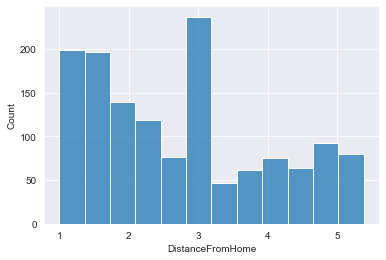

In [257]:
#Removing skewness
dsnew['DistanceFromHome']=np.sqrt(dsnew['DistanceFromHome'])
sns.histplot(dsnew['DistanceFromHome'])

<AxesSubplot:xlabel='JobLevel', ylabel='Count'>

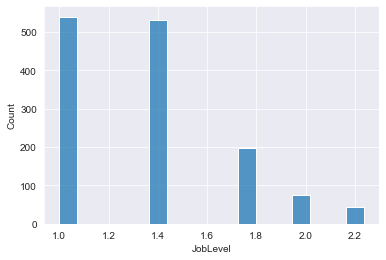

In [258]:
#Removing skewness
dsnew['JobLevel']=np.sqrt(dsnew['JobLevel'])
sns.histplot(dsnew['JobLevel'])

In [259]:
#Removing skewness 
dsnew['NumCompaniesWorked']=np.sqrt(dsnew['NumCompaniesWorked'])
sns.histplot(dsnew[''])

KeyError: ''

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

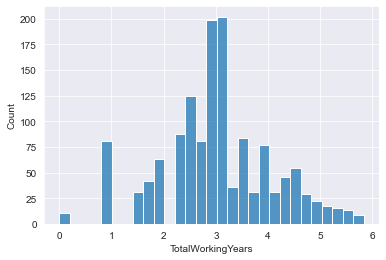

In [260]:
#Removing skewnes 
dsnew['TotalWorkingYears']=np.sqrt(dsnew['TotalWorkingYears'])
sns.histplot(dsnew['TotalWorkingYears'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

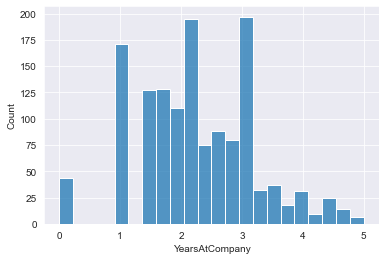

In [261]:
#Removing skewness
dsnew['YearsAtCompany']=np.sqrt(dsnew['YearsAtCompany'])
sns.histplot(dsnew['YearsAtCompany'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

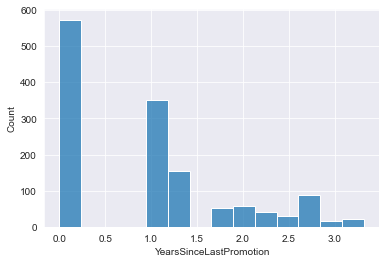

In [262]:
#Removing skewness
dsnew['YearsSinceLastPromotion']=np.sqrt(dsnew['YearsSinceLastPromotion'])
sns.histplot(dsnew['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

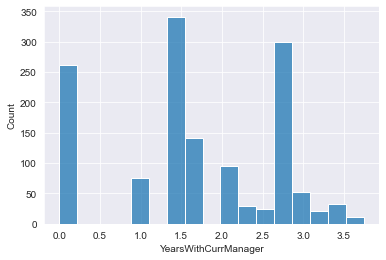

In [263]:
#Removing skewness
dsnew['YearsWithCurrManager']=np.sqrt(dsnew['YearsWithCurrManager'])
sns.histplot(dsnew['YearsWithCurrManager'])

In [282]:
#Encoding the categorical varibales
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in dsnew.columns:
    if dsnew[i].dtypes=='object':
        dsnew[i]=oe.fit_transform(dsnew[i].values.reshape(-1,1))
dsnew

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,1,2,...,3,1,0,2.828427,0,1,2.449490,4,0.000000,2.236068
1,49,0.0,1.0,279,1.0,2.828427,1,1.0,2,3,...,4,4,1,3.162278,3,3,3.162278,7,1.000000,2.645751
2,37,1.0,2.0,1373,1.0,1.414214,2,4.0,4,4,...,3,2,0,2.645751,3,3,0.000000,0,0.000000,0.000000
3,33,0.0,1.0,1392,1.0,1.732051,4,1.0,5,4,...,3,3,0,2.828427,3,3,2.828427,7,1.732051,0.000000
4,27,0.0,2.0,591,1.0,1.414214,1,3.0,7,1,...,3,4,1,2.449490,3,3,1.414214,2,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,4.795832,2,3.0,2061,3,...,3,3,1,4.123106,3,3,2.236068,2,0.000000,1.732051
1466,39,0.0,2.0,613,1.0,2.449490,1,3.0,2062,4,...,3,1,1,3.000000,5,3,2.645751,7,1.000000,2.645751
1467,27,0.0,2.0,155,1.0,2.000000,3,1.0,2064,2,...,4,2,1,2.449490,0,3,2.449490,2,0.000000,1.732051
1468,49,0.0,1.0,1023,2.0,1.414214,3,3.0,2065,4,...,3,4,0,4.123106,3,2,3.000000,6,0.000000,2.828427


In [283]:
dsnew.shape

(1387, 32)

In [284]:
x=dsnew.drop(columns=['Attrition'])
y=dsnew['Attrition']

In [285]:
x.shape

(1387, 31)

In [286]:
y.shape

(1387,)

In [287]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [288]:
x_over.shape

(2316, 31)

In [289]:
y_over.shape

(2316,)

In [290]:
y_over.value_counts()

0.0    1158
1.0    1158
Name: Attrition, dtype: int64

In [291]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over=scale.fit_transform(x_over)
x_over

array([[ 0.71676958,  0.66620009,  0.82811372, ...,  0.23365048,
        -1.03559777,  0.72634506],
       [ 1.65055574, -0.99442454, -1.33871434, ...,  1.23389912,
         0.0812327 ,  1.14282181],
       [ 0.2498765 ,  0.66620009,  1.54161361, ..., -1.10001437,
        -1.03559777, -1.5468017 ],
       ...,
       [-0.33373985,  0.66620009,  1.19407861, ...,  0.90048291,
         1.97910289,  1.17091207],
       [-0.9173562 ,  0.66620009,  0.25152157, ..., -1.10001437,
         0.54383903, -1.05320847],
       [ 0.60004631, -0.9879947 , -1.68624933, ...,  1.23389912,
         1.91646549,  1.14282181]])

In [292]:
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8805755395683453 on random state 75


In [293]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 31)
(417, 31)
(970,)
(417,)


70% of the data (970 rows) will be available for training the model & 30% (417 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report,Auc ROC curve

In [294]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8321342925659473
[[343   0]
 [ 70   4]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       343
         1.0       1.00      0.05      0.10        74

    accuracy                           0.83       417
   macro avg       0.92      0.53      0.50       417
weighted avg       0.86      0.83      0.76       417



In [295]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8441247002398081
[[312  31]
 [ 34  40]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       343
         1.0       0.56      0.54      0.55        74

    accuracy                           0.84       417
   macro avg       0.73      0.73      0.73       417
weighted avg       0.84      0.84      0.84       417



In [296]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7745803357314148
[[293  50]
 [ 44  30]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       343
         1.0       0.38      0.41      0.39        74

    accuracy                           0.77       417
   macro avg       0.62      0.63      0.63       417
weighted avg       0.78      0.77      0.78       417



In [297]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8225419664268585
[[343   0]
 [ 74   0]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       343
         1.0       0.00      0.00      0.00        74

    accuracy                           0.82       417
   macro avg       0.41      0.50      0.45       417
weighted avg       0.68      0.82      0.74       417



In [298]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8249400479616307
[[343   0]
 [ 73   1]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       343
         1.0       1.00      0.01      0.03        74

    accuracy                           0.82       417
   macro avg       0.91      0.51      0.47       417
weighted avg       0.86      0.82      0.75       417



In [299]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.841726618705036
[[338   5]
 [ 61  13]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       343
         1.0       0.72      0.18      0.28        74

    accuracy                           0.84       417
   macro avg       0.78      0.58      0.60       417
weighted avg       0.82      0.84      0.80       417



In [300]:
# Ada Boost Classifer
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(n_estimators=100,random_state=42,algorithm='SAMME')
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.8752997601918465
[[339   4]
 [ 48  26]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       343
         1.0       0.72      0.18      0.28        74

    accuracy                           0.84       417
   macro avg       0.78      0.58      0.60       417
weighted avg       0.82      0.84      0.80       417



Based on the results of above models, and capomaring the Accuracy score and other evalution matrics result of recall, precision. Accuracy_Score
1 LogisticRegression 0.84 2.Gaussian Naive_bayes 0.84 3 DecisionTreeClassifier 0.74
4 Random Forest Classifier 0.84 5 AdaBoost Classifier 0.86 6.Linear SVC 0.83

Random Forest & AdaBoost classifier have the best accuracy score among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.

# Cross Validation

Cross check the accuracy of the algorithim used above

In [301]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.84172662 0.79856115 0.81588448 0.77256318 0.85198556]
0.8161441965561125 0.02880138830986915


In [302]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.84172662 0.8381295  0.83754513 0.83393502 0.85198556]
0.8406643638158066 0.006176360550611867


In [303]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.74820144 0.81294964 0.78700361 0.77978339 0.76534296]
0.7786562086071216 0.021687437358314604


In [304]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.83453237 0.83453237 0.83393502 0.83393502 0.83754513]
0.8348959821312626 0.0013512431787340833


In [305]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.83093525 0.82733813 0.83032491 0.81588448 0.83754513]
0.8284055787860687 0.007092698445822303


In [306]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.85251799 0.86330935 0.86281588 0.85559567 0.85559567]
0.8579669116692206 0.004312553791000219


In [307]:
adscores =cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.85611511 0.88848921 0.85920578 0.87364621 0.84476534]
0.8644443290133236 0.015145373487555859


It can be observed that the "Ada Boost Classifier" algorithim has the almost same accuracy score before and after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Ada Boost" is the best model for predicting the Attrition rate.

# AUC ROC Curve

In [308]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

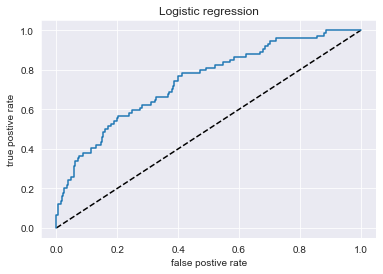

0.527027027027027

In [309]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

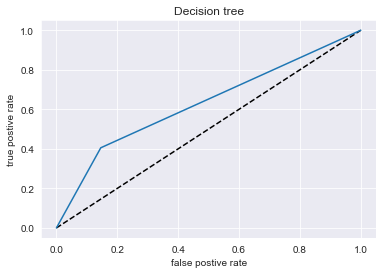

0.6298164053266094

In [310]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

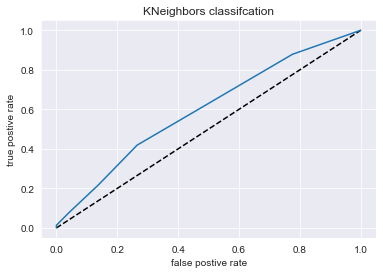

0.5067567567567568

In [311]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('KNeighbors classifcation')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

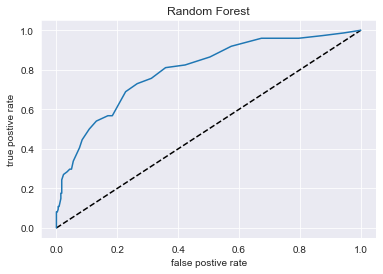

0.5805492081002285

In [312]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

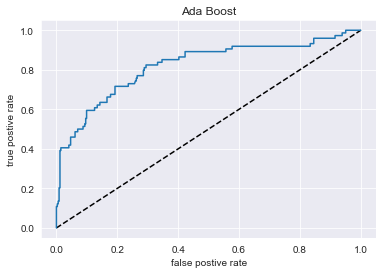

0.6698447718855882

In [313]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boost classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Ada Boost')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

Key Observations: Ada Boost Classifier model has highest area under the curve. And AUC ROC score is 70%.It means our model can predict 70% effectively.

# HyperParameter tuning

In [175]:
from sklearn.model_selection import GridSearchCV 
parameter={'n_estimators':np.arange(40,100), 'algorithm':['SAMME', 'SAMME.R'],'learning_rate':np.arange(1,10)}

In [176]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [177]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [178]:
GCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 68}

In [182]:
from sklearn.ensemble import AdaBoostClassifier
final= AdaBoostClassifier(n_estimators=68,random_state=50,algorithm='SAMME',learning_rate= 1,)
#Adabosstclassifier(100)----Default
final.fit(x_train,y_train)
predad=final.predict(x_test)
final.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.8657074340527577
[[329  17]
 [ 39  32]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       346
         1.0       0.69      0.15      0.25        71

    accuracy                           0.84       417
   macro avg       0.77      0.57      0.58       417
weighted avg       0.82      0.84      0.80       417



# Save the best Model

In [183]:
import joblib
joblib.dump(final,'Model_HR-Attrition.obj')

['Model_HR-Attrition.obj']